In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [140]:
subnrs = ['test-01']
subnr = 'test-01'
sesnr = 'test-01'
runnr = 'test-03' # runs 1 and 3 were TOJ, run 2 was SJ

# load events df
data_path = f'TempInt_pilot/sub-{subnr}/ses-{sesnr}/sub-{subnr}_sess-{sesnr}_task-TempInt_run-{runnr}_events.tsv'
dat = pd.read_csv(data_path, sep='\t')
# select only rows with responses in phase 2
dat=dat[(dat.phase == 2) & (dat.event_type == 'response')]
# dat

In [141]:
## construct df for plotting

soas = [] # stimulus onset asynchrony
resps = [] # responses
subs = [] # subject
which_first = [] # A or V first?

for subnr in subnrs:
    data_path = f'TempInt_pilot/sub-{subnr}/ses-{sesnr}/sub-{subnr}_sess-{sesnr}_task-TempInt_run-{runnr}_events.tsv'
    dat = pd.read_csv(data_path, sep='\t')

    for trial in dat.trial_nr.unique():
        
        trial_df = dat[dat.trial_nr == trial]
        soa = trial_df.soa.iloc[0]
        
        try:
            response_correct = trial_df[(trial_df.event_type == 'response') & (trial_df.phase == 2)].correct.values[0]
        except IndexError:
            response_correct = None
        
        soas.append(soa)
        resps.append(response_correct)
        subs.append(subnr)
        which_first.append(trial_df.order.iloc[0][0])
        
resps_df = pd.DataFrame({'soa' : soas,'response' : resps, 'subject': subs, 'first':which_first})

# negative SOAs needed for flipping
resps_df['neg_soa'] = -resps_df['soa']

comb_soa = []
responses_flipped = []

for i, row in resps_df.iterrows():
#     print(row)

    if row['first'] == 'V':
        comb_soa.append(row['neg_soa'])
        # flip response
        if row['response'] == 0.0:
            responses_flipped.append(1.0)
        else:
            responses_flipped.append(0.0)
        
    else:
        comb_soa.append(row['soa'])
        responses_flipped.append(row['response'])
        

resps_df['comb_soa'] = comb_soa
resps_df['responses_flipped'] = responses_flipped
resps_df

,soa,response,subject,first,neg_soa,comb_soa,responses_flipped
0,2.0,0.0,test-01,V,-2.0,-2.0,1.0
1,64.0,1.0,test-01,V,-64.0,-64.0,0.0
2,64.0,1.0,test-01,V,-64.0,-64.0,0.0
3,8.0,1.0,test-01,V,-8.0,-8.0,0.0
4,8.0,1.0,test-01,V,-8.0,-8.0,0.0
...,...,...,...,...,...,...,...
275,1.0,1.0,test-01,V,-1.0,-1.0,0.0
276,2.0,1.0,test-01,V,-2.0,-2.0,0.0
277,32.0,1.0,test-01,V,-32.0,-32.0,0.0
278,64.0,1.0,test-01,A,-64.0,64.0,1.0


/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

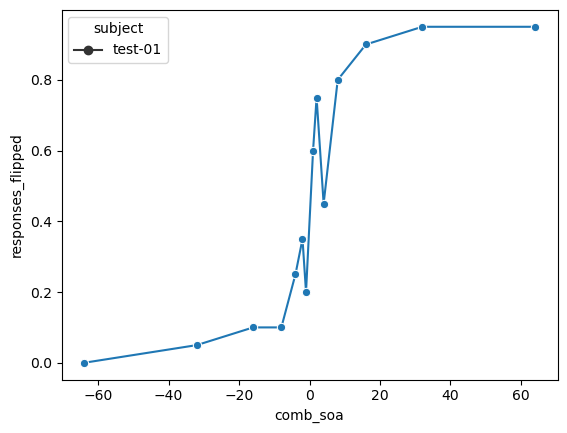

In [157]:
import seaborn as sns
sns.lineplot(data=resps_df, x='comb_soa', y = 'responses_flipped', errorbar = None, estimator='mean', style="subject", markers=True)
# plt.plot(resps_df['comb_soa'], resps_df['responses_flipped'], 'o', color='blue')

plt.show()

/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

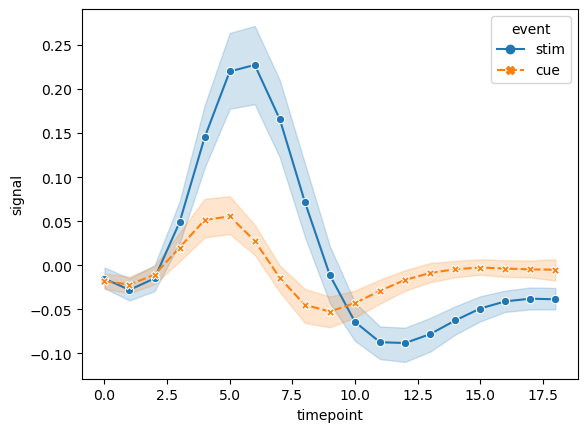

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = sns.load_dataset("fmri")

# Create a lineplot with markers
sns.lineplot(data=data, x="timepoint", y="signal", hue="event", style="event", markers=True)

# Show the plot
plt.show()

/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: xlabel='soa', ylabel='response'>

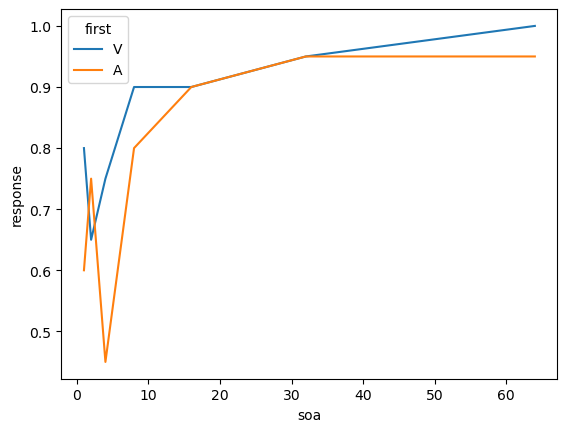

In [71]:
sns.lineplot(data=resps_df, x='soa', y = 'response', hue = 'first', errorbar = None)

## SJ

In [46]:
subnrs = ['test-01']
subnr = 'test-01'
sesnr = 'test-01'
runnr = 'test-02'


data_path = f'TempInt_pilot/sub-{subnr}/ses-{sesnr}/sub-{subnr}_sess-{sesnr}_task-TempInt_run-{runnr}_events.tsv'
dat = pd.read_csv(data_path, sep='\t')


In [47]:
dat=dat[(dat.phase == 2) & (dat.event_type == 'response')]
dat

,trial_nr,onset,event_type,phase,response,nr_frames,order,soa,key,RT_ 0,onset_abs,duration
3,0,3.564317,response,2,asynchronous,NaN,VA,64.0,l,1.051389,11.760715,NaN
7,1,5.313522,response,2,asynchronous,NaN,VA,0.0,l,0.684635,13.509920,NaN
11,2,7.062609,response,2,synchronous,NaN,VA,2.0,a,0.351342,15.259007,NaN
15,3,8.797891,response,2,synchronous,NaN,VA,2.0,a,0.334490,16.994289,NaN
19,4,10.614400,response,2,synchronous,NaN,AV,2.0,a,0.418330,18.810798,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,255,555.130088,response,2,asynchronous,NaN,AV,64.0,l,0.701089,563.326486,NaN
1028,256,557.196083,response,2,asynchronous,NaN,VA,16.0,l,0.584481,565.392481,NaN
1032,257,560.177874,response,2,synchronous,NaN,VA,64.0,a,0.583910,568.374272,NaN
1036,258,562.727242,response,2,synchronous,NaN,AV,2.0,a,1.067430,570.923640,NaN


In [57]:
# subnrs = ['97', '01']
subnrs = ['test-01']
sesnr = 'test-01'
runnr = 'test-02'

soas = []
resps = []
subs = []
which_first = []

for subnr in subnrs:
#     subnr = '97'
    data_path = f'TempInt_pilot/sub-{subnr}/ses-{sesnr}/sub-{subnr}_sess-{sesnr}_task-TempInt_run-{runnr}_events.tsv'
    dat = pd.read_csv(data_path, sep='\t')
    for trial in dat.trial_nr.unique():
    #     print(trial)
        trial_df = dat[dat.trial_nr == trial]
        soa = trial_df.soa.iloc[0]
        try:
            response = trial_df[(trial_df.event_type == 'response') & (trial_df.phase == 2)].response.values[0]
        except IndexError:
            response = None
        first = trial_df.order.iloc[0][0]
#         print(first)
        soa = soa if first == 'A' else -soa 
        soas.append(soa)
#         print(response)
        response = 1 if response == 'synchronous' else 0
#         print(response)
        resps.append(response)
        subs.append(subnr)
        which_first.append(first)
        
        
resps_df = pd.DataFrame({'soa' : soas,'response' : resps, 'subject': subs, 'first':which_first})
resps_df.response

0      0
1      0
2      1
3      1
4      1
      ..
255    0
256    0
257    1
258    1
259    1
Name: response, Length: 260, dtype: int64

/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xavfunk/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<Axes: xlabel='soa', ylabel='response'>

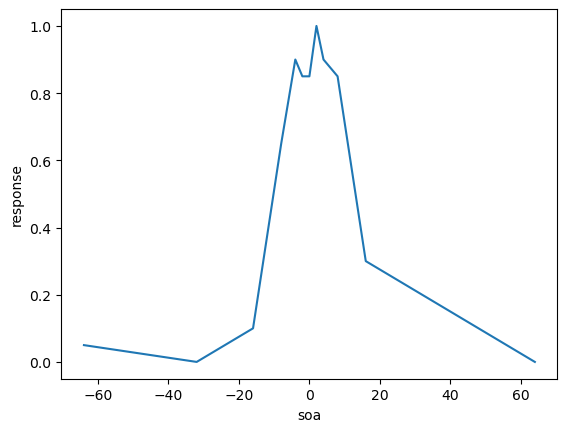

In [61]:
sns.lineplot(data=resps_df, x='soa', y = 'response', errorbar = None, markers = True,)

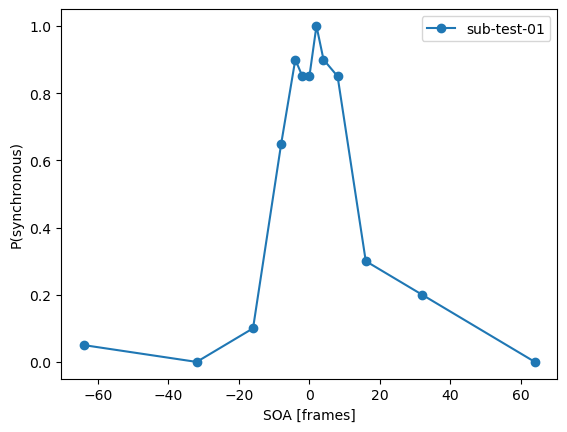

In [63]:
fig, ax =  plt.subplots()

for subnr in subnrs:
    means = []
    stds = []
    sub_df = resps_df[resps_df.subject == subnr]

    soas = sub_df.soa.unique()
    soas.sort()
    for soa in soas:
#         print(op)    
        mean = sub_df[sub_df.soa == soa].response.mean()
        std = sub_df[sub_df.soa == soa].response.std()
        
        # flip answers for 0-opacity
#         if soa == 0.0:
#             mean = 1-mean
        
        means.append(mean)
        stds.append(std)
        
    ax.plot(soas, means, marker = 'o', label = f'sub-{subnr}')
    

ax.set_ylabel('P(synchronous)')
ax.set_xlabel('SOA [frames]')
ax.legend()